# <center> HW1 - Real Estate Linear Regression </center>

# Question 1: NumPy Linear Regression
In this question, students will implement the linear regression model via stochastic gradient descent (SGD) to predict the real estate cost using the provided data. Students must use only NumPy, Stat, Pandas, and Matplotlib in this question.

a) Perform pre-processing and EDA on the data and split it into training and testing datasets. Have a split ratio of 75% and 25% for the training and testing datasets, respectively. Please explain the performance. Students can make visualizations if necessary.

# A. Load Data

In [411]:
import pandas as pd
import numpy as np

DF = pd.read_csv('Real_Estate.csv')
DF.head(3)


,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3


Let's take a look at a few observations in our data, and try to understand more about how features may be related to our target. While we can enter the pre-processing and exploratory data analysis phase with assumptions on how our features of X1-X6 (wherein X5,X6 ~ location) on our target Y ~ house price per unit area, it will be best to statistically compute relations between our data, such that we can balance computational costs with model accuracy for a highly effective linear regression predictive model.

# B. Exploratory Data Analysis (EDA)
## B.1 Values
Let's understand the structure of the 'Real Estate.csv' dataset (NOTE: I renamed it to Real_Estate.csv)

In [412]:
DF.shape

(414, 8)

This output suggests that there are 414 observations provided in the dataset. Of the 414 examples, we will use 75% for training the dataset and 25% to test the validity of our model.

In [413]:
DF.dtypes

No                                          int64
X1 transaction date                       float64
X2 house age                              float64
X3 distance to the nearest MRT station    float64
X4 number of convenience stores             int64
X5 latitude                               float64
X6 longitude                              float64
Y house price of unit area                float64
dtype: object

Given the types of our data, we are able to see that we have 6 features, X1-X6 which we will use to capture patterns amongst desired features (and combinations of them) which will allow us to minimize errors in our model and its predictions.

In [414]:
DF.describe()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,207.500000,2013.148971,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,119.655756,0.281967,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,1.000000,2012.667000,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,104.250000,2012.917000,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,207.500000,2013.167000,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,310.750000,2013.417000,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,414.000000,2013.583000,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


By taking a short look at the distribution provided by the fields in our data set, we can learn more about how relations may be present and how data and its meaning is represented. For example, we can see that the average (mean) house price per unit area is 37.98 Taiwanese dollars. Also, the median house price per unit area (50% position/2nd Quarter) is 38.45 Taiwanese dollars. 

From this, we can see that mean < median (house price per unit area), but not considerably, which is a good sign. The fact they are quite close to each other assures us that we have a large, diverse enough dataset to capture relevant patterns between our features (X1-X6) and our target (Y ~ house price per unit area) in terms of preparing our data for model implementation.

Another piece of good news is that the fact that our mean < median helps us assure validity of our data this point. The provided statistical description that our data ~ house price per unit area has a <bold> slight <bold> left (negative) skew checks out well with the general capialist renters market, in which there is a higher volume of more affordable (normal and inferior [in terms of macroeconomics]) housing than there is of its more luxurious counterpart, as the capitalist system relies on exploitation of the mass of people.

In [415]:
DF.isnull().sum()

No                                        0
X1 transaction date                       0
X2 house age                              0
X3 distance to the nearest MRT station    0
X4 number of convenience stores           0
X5 latitude                               0
X6 longitude                              0
Y house price of unit area                0
dtype: int64

Above, we check the missing values in the dataset. Fortunately, we don't have any observations with missing column-data. 

## B.1 Visualization

In [416]:
import matplotlib.pyplot as plt

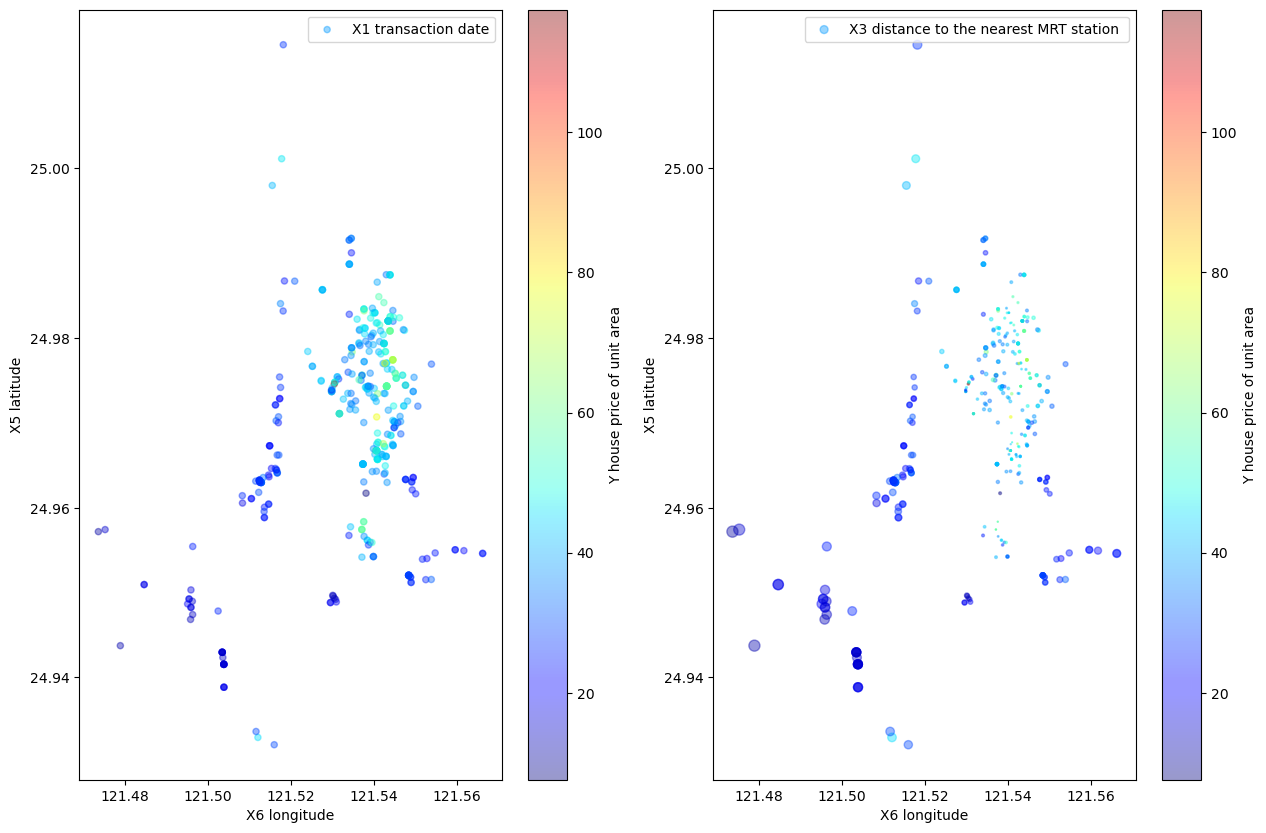

In [417]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(15,10))
DF.plot(kind="scatter",x="X6 longitude",y="X5 latitude", alpha=0.4, s=DF["X1 transaction date"]/100,
       label="X1 transaction date",c="Y house price of unit area", cmap=plt.get_cmap("jet"),colorbar=True, ax=ax1)

DF.plot(kind="scatter",x="X6 longitude",y="X5 latitude", alpha=0.4, s=DF["X3 distance to the nearest MRT station"]/100,
       label="X3 distance to the nearest MRT station ",c="Y house price of unit area", cmap=plt.get_cmap("jet"),colorbar=True, ax=ax2)
plt.legend()
plt.show()

Notably, we can use graphical representations to show how the housing market (house price of unit area) and the features (X1-X4) may be related. Above, we can see the graphical mappings (latitude, longitude) against two features X1 (transaction date) and X3 (distance to the nearest MRT station) have notable impact on the target Y (house price per unit area), even as we take just 1% of the value of the data. This may suggest that these attriutes are naturally and strongly correlated with the house price per unit area. 

Below, we have comparatively "amplified" the data on X2 (house age) and X4 (number of convenience stores) by different degrees of 10, in order to try to capture the bigger and better picture of the data. The fact that the maps without this amplification doesn't gain much use for us is not a problem at all actually, as there can very well still be underlying patterns and correlations that just necessitate success in the pre-processing phase, and further data training process.

Particularly, it is useful to note in the graph demonstrating the number of convenience stores (below on the right) that as we get further away from more populous zones (identifiable from densely packed, and maybe more expensive, housing units). The insight gained from this map suggests that convenience stores are less common in less populated zones, and more prevalent in highly populous areas, which makes logical sense.

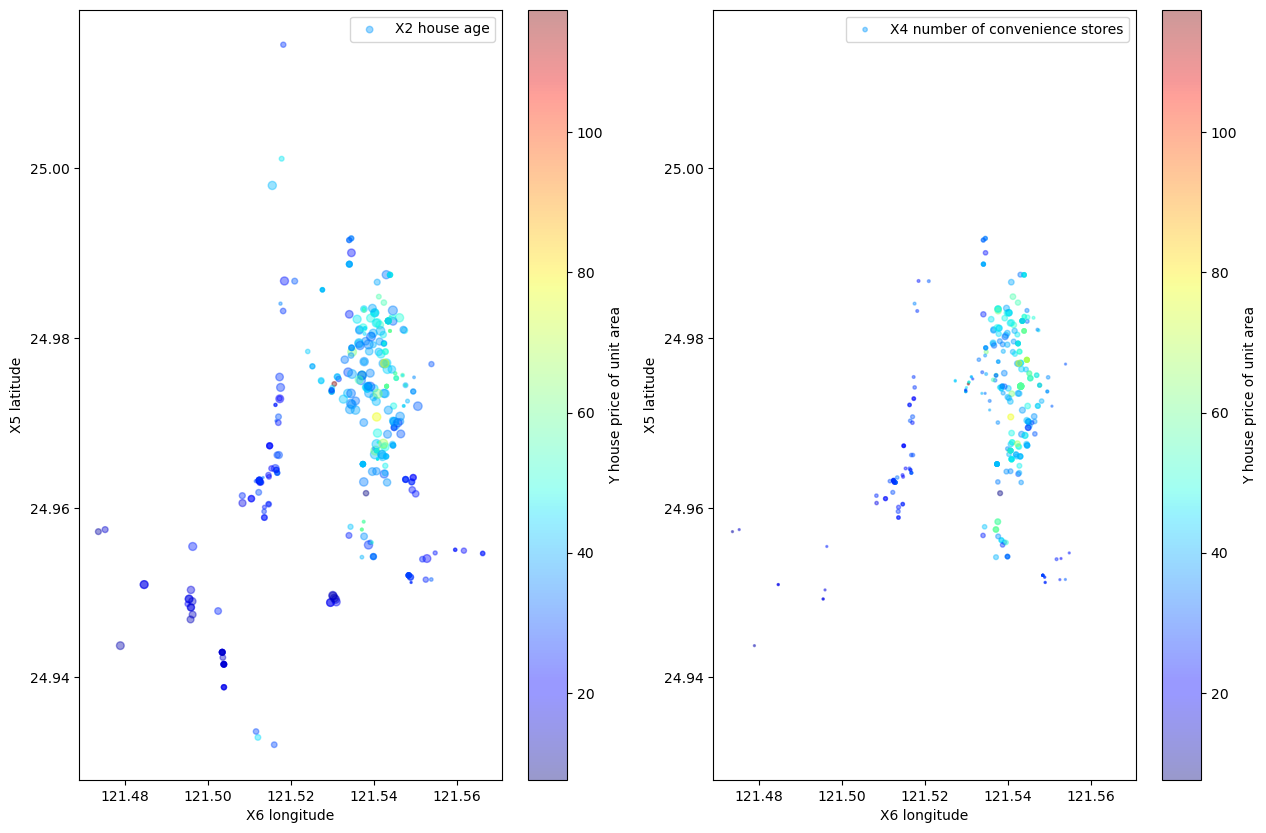

In [418]:
fig, (ax3, ax4) = plt.subplots(1, 2,figsize=(15,10))
DF.plot(kind="scatter",x="X6 longitude",y="X5 latitude", alpha=0.4, s=DF["X2 house age"],
       label="X2 house age",c="Y house price of unit area", cmap=plt.get_cmap("jet"),colorbar=True, ax=ax3)

DF.plot(kind="scatter",x="X6 longitude",y="X5 latitude", alpha=0.4, s=DF["X4 number of convenience stores"]*2,
       label="X4 number of convenience stores",c="Y house price of unit area", cmap=plt.get_cmap("jet"),colorbar=True, ax=ax4)
plt.legend()
plt.show()

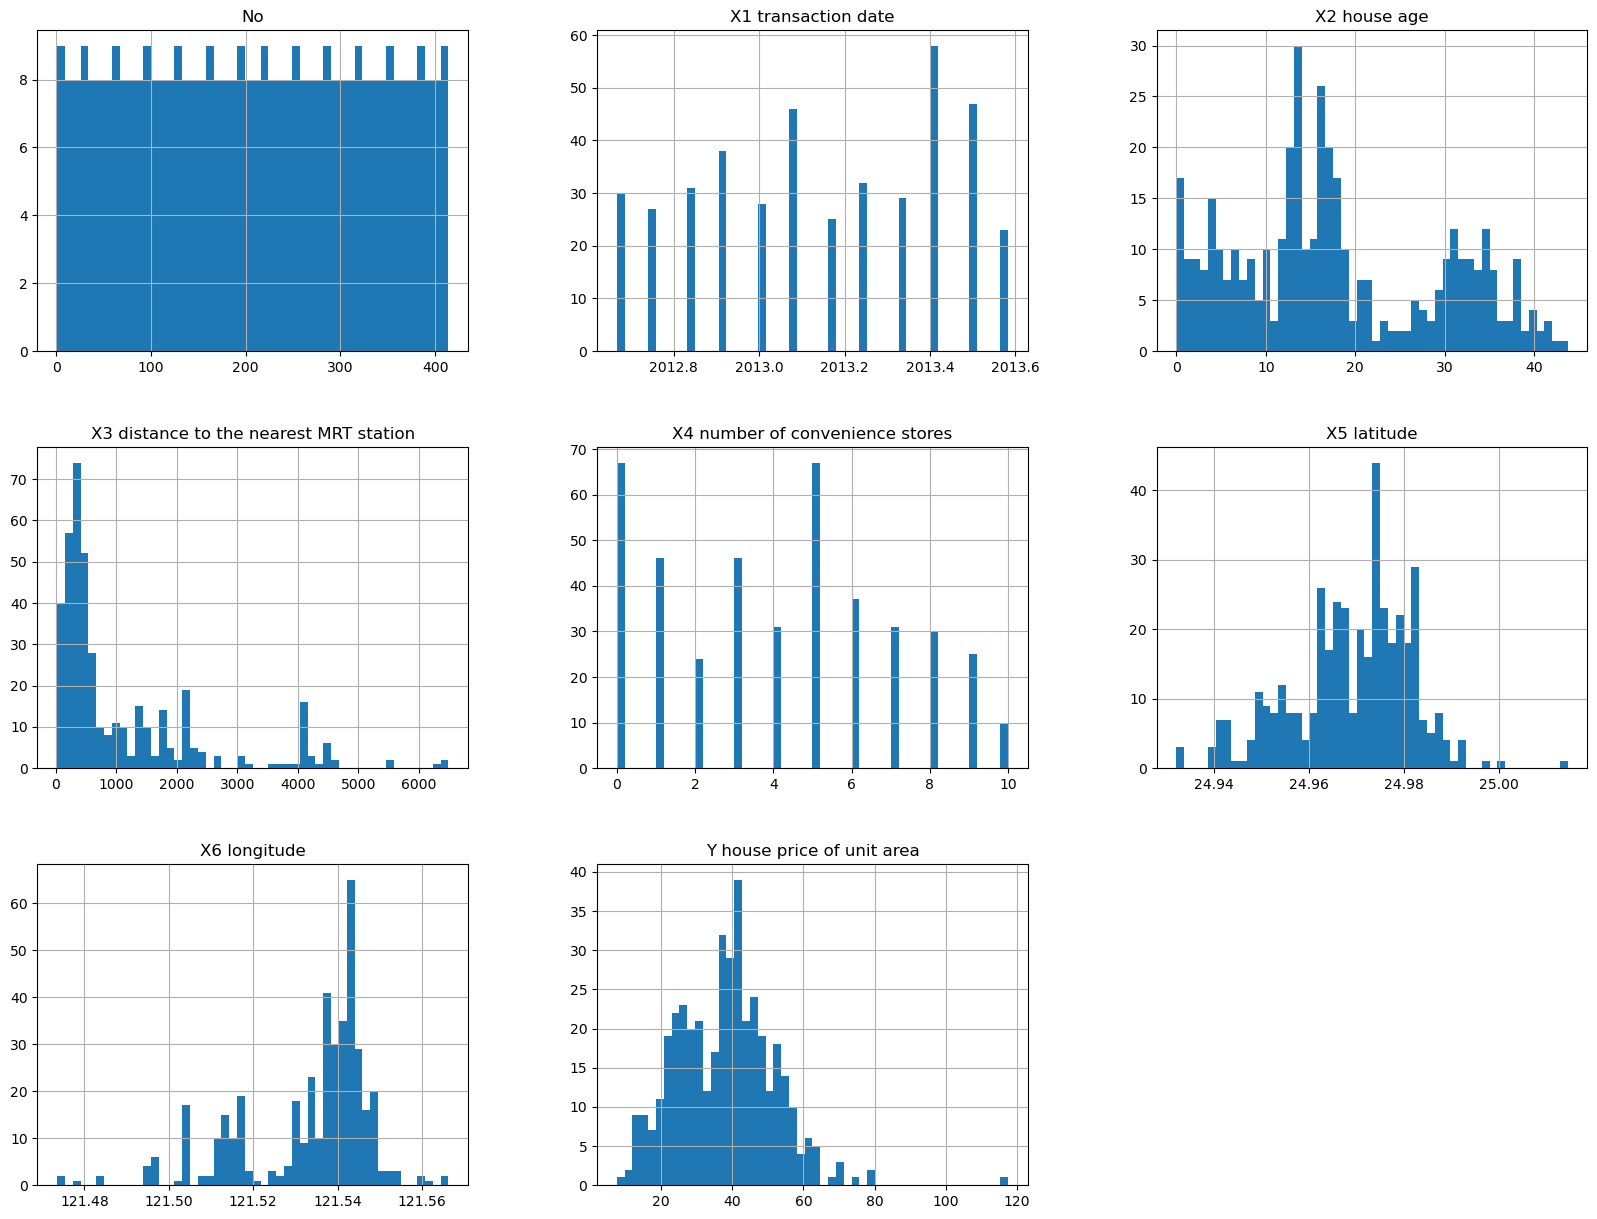

In [419]:
DF.hist(bins=50, figsize=(20,15))
plt.show()

In this histogram, we can get a sense for each columns separate distributions. From this, we can note details such as whether each feature generally faces a upside-down U shaped distribution and skewness to the left or right to suggest if data is normally distributed, as is required by the algorithm, and to keep note of which columns may contain outliers or skewness that need to be dealt with. All of these properties must be checked, such that we have a normal distribution without sensitivity-producing outliers, which we can achieve through different skewed data transformations and outlier-reimputations (without changing the model performance). 

The histogram for X1 above brings about some good news, as we look for features that may not be particularly desirable for our ML algorithm. Particularly looking at the values in this feature X1 ~ transaction date, our observations were all taken in a small timeframe, from about September 2012 to about May 2013. We can understand that in the vast majority of cases, particularly given conditions of a stable economy, prices don't change so drastically in the short-run timeframe.

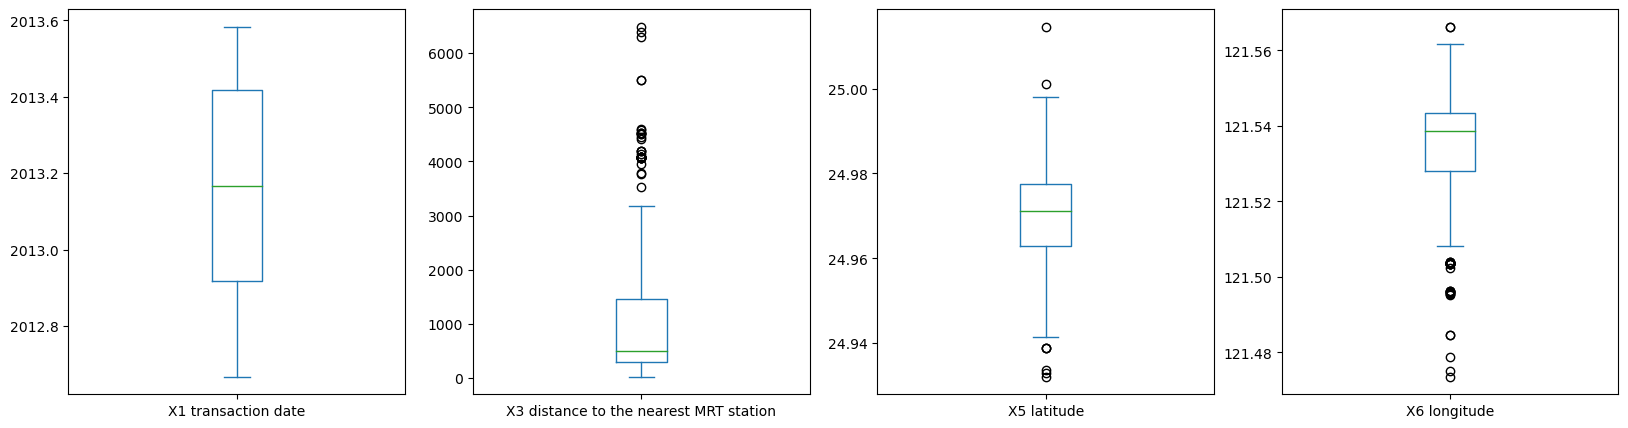

In [420]:
from scipy.stats import lognorm
import statsmodels.api as sm

fig, (ax1, ax2, ax6, ax7) = plt.subplots(1, 4,figsize=(20,5))
DF['X1 transaction date'].plot.box(ax=ax1)

DF['X3 distance to the nearest MRT station'].plot.box(ax=ax2)

DF['X5 latitude'].plot.box(ax=ax6)

DF['X6 longitude'].plot.box(ax=ax7)
plt.show()

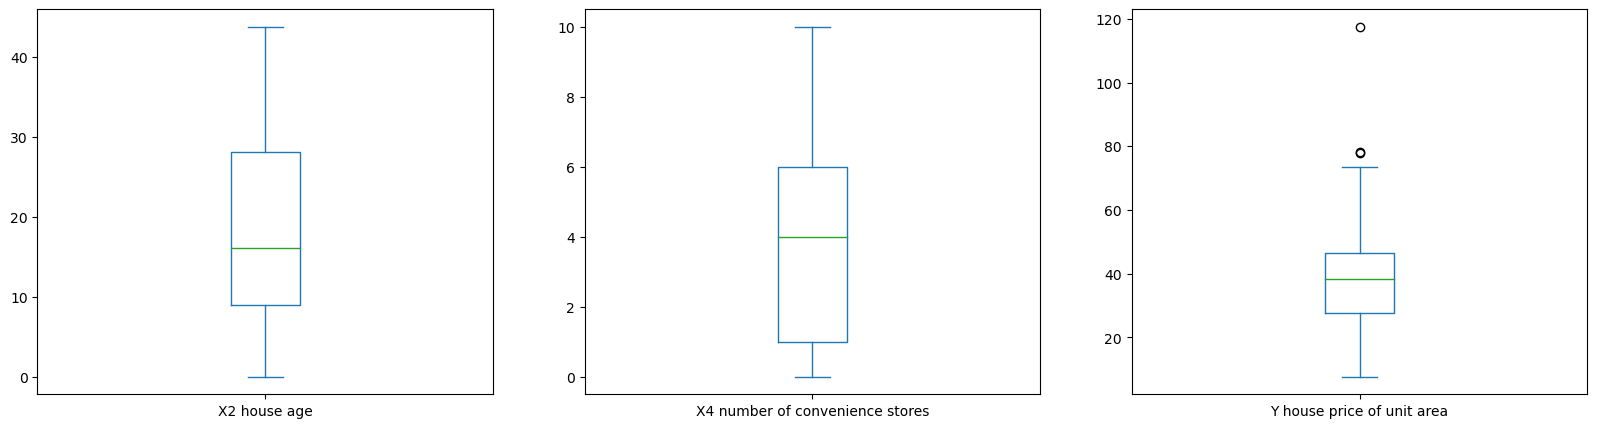

In [421]:
fig, (ax3, ax4, ax5) = plt.subplots(1, 3, figsize=(20,5))
DF['X2 house age'].plot.box(ax=ax3)

# DF_ = DF[DF['median_income']<=8]
DF['X4 number of convenience stores'].plot.box(ax=ax4)


DF["Y house price of unit area"].plot.box(ax=ax5)
plt.show()

A box plot can show the data distribution and outliers in each feature with more statistical precision than the histograms, so we may choose the box plots as a final layer of protection as we decide how to handle outliers such that the model performance is optimized. 

Features X1, X2, and X4 don't contain outliers, and appear normally distributed despite having left (X2, X4) and right (X1) skew. Features X5 and X6 have outliers though these positional data columns will be dealt with using feature engineering, or another very similar method, later on. We can likely assume integrity in this precise latitude longitude data, and compose a feature out of it.

X3 has many outliers, and the volume of the outliers suggest there is maybe a good reason to keep such outliers, and instead assess later on how they may possibly end up making the model more sensitive, or whether they are actually integral to our model performance. It may be to early in the analysis phase to fully understand. Intuitively, it may be good to allow these outliers make the model more sensitive if it means it will actually make our predictions most accurate, as they are likely legitimate data points referencing a mass of people living in suburbs, or the general areas where it is common to not have convenience stores around. We will assess X3 as we go through the EDA, pre-processing phase as potential for outlier handling.

On the other hand, it is considerable that almost all places in a city such as Tei Pei would have MRT stations closeby in all of its city limits. This concept may drive further motivation to explore dropping such outliers and reimputing with its mean/median value. 

Our target (Y ~ house price of unit area) has a very minimal amount of outliers, so there is little incentive to deal with these outliers as the patterns in the data will surely still be captured. Unless a sensitivity issue comes up in the implementation process, it may be trivial to assess at the moment, but instead later on recognize that the model may be affected by outliers in our target data. It is true that we don't want our model to assume an outlier and be subject to these sensitivities, particularly in terms of predicting a final value, so it will duelly be important to note that Y has presence of at least 2 outliers.

QQ-plots will be effective for assessing the degree of skew in our data. We have realized X3 (for the most part) needs some focus in our pre-processing phase, but it should be noted that each feature (that we will want to use) should be scaled effectively based on the skew and distribution it holds. QQ-plots will help us visually assess skew and normality, whereas a Kologorov-Smirnov test will confirm normality. Let's employ QQ-plots on our features of interest, in order to keep note of our skew, and the degree of them. This will help us one step closer in transforming our data for preparedness in our model.

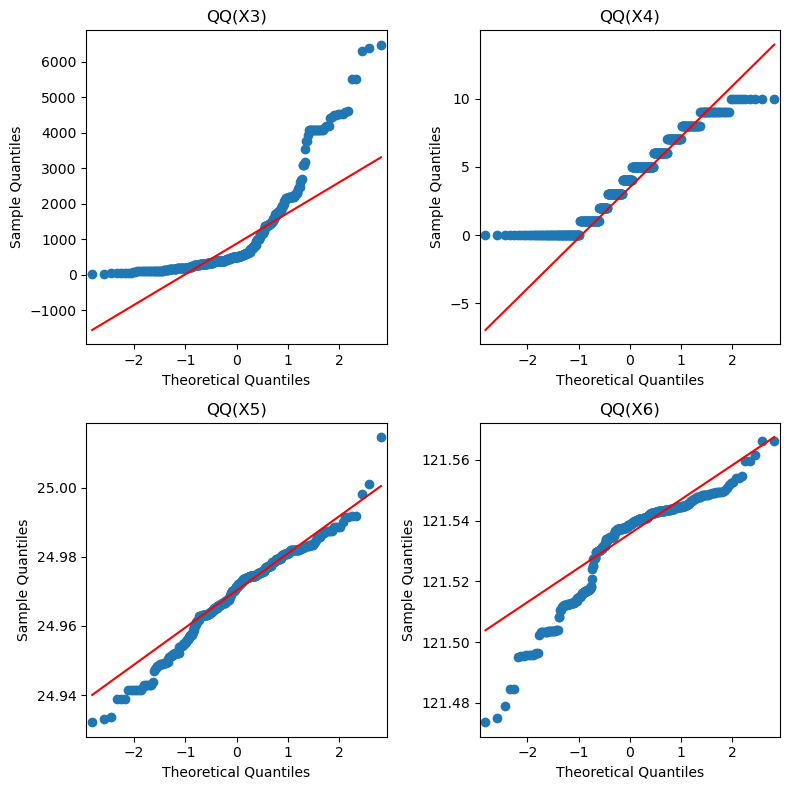

In [422]:
fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(2, 2, figsize=(8,8))
fig = sm.qqplot(DF['X3 distance to the nearest MRT station'], line='q', ax=ax1)
ax1.set_title('QQ(X3)')
fig = sm.qqplot(DF['X4 number of convenience stores'], line='q',ax=ax2)
ax2.set_title('QQ(X4)')
fig = sm.qqplot(DF['X5 latitude'], line='q', ax=ax3)
ax3.set_title('QQ(X5)')
fig = sm.qqplot(DF['X6 longitude'], line='q', ax=ax4)
ax4.set_title('QQ(X6)')
plt.tight_layout()
plt.show()

We can remember that none of our features fit a normal distributuion. Noted from QQ plots above, there is not an extremely notable skew in the X3 QQ plot. The X4 QQ plot does hold a notable skew, that is a right skew. We can note this because at each integer value from [0,7], our points are packed more above the line. From [8,10] convenience stores, points rest below the line. I predict that upon proper scaling of the data for X4 will lead to increased model performance. In addition, our X5 and X6 ~ latitude, longitude have left skews. Though I have been on the fence as to how this (positional) data should be dealt with, it may make sense to scale these as well such that all feature values are closer. Especially as latitude and longitude represent arc-distance (positional data on Earth) that can be equivalently represented as distance through euclidean geometry, our model may react better to scaling these features.  As it turns out, it may be necessary and most efficient to scale all features in this phase. 

In [423]:
corr_matrix = DF[DF.columns.tolist()].corr()
corr_matrix.style.background_gradient(cmap='coolwarm')

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
No,1.000000,-0.048658,-0.032808,-0.013573,-0.012699,-0.010110,-0.011059,-0.028587
X1 transaction date,-0.048658,1.000000,0.017549,0.060880,0.009635,0.035058,-0.041082,0.087491
X2 house age,-0.032808,0.017549,1.000000,0.025622,0.049593,0.054420,-0.048520,-0.210567
X3 distance to the nearest MRT station,-0.013573,0.060880,0.025622,1.000000,-0.602519,-0.591067,-0.806317,-0.673613
X4 number of convenience stores,-0.012699,0.009635,0.049593,-0.602519,1.000000,0.444143,0.449099,0.571005
X5 latitude,-0.010110,0.035058,0.054420,-0.591067,0.444143,1.000000,0.412924,0.546307
X6 longitude,-0.011059,-0.041082,-0.048520,-0.806317,0.449099,0.412924,1.000000,0.523287
Y house price of unit area,-0.028587,0.087491,-0.210567,-0.673613,0.571005,0.546307,0.523287,1.000000


A correlation matrix may be able to identify the potential for feature engineering, notably between (groups of) features which have high correlation coefficients. In this case, it is particularly suggestable that feature engineering can be done between shared groups of features that have notably high (positive or negative) relations, particularly as it depends on hitting higher correlations onto the target. I believe it may be good to use feature engineering in combination with all location-based data. The data here suggests that population-based features compose actually the biggest weight (correlation) on Y ~ the house price per unit area. 

In addition, if we look at the correlation matrix below, we will only note a slight 0.0875 correlation to our target for X1 (transaction date), and the scatter matrix only shows a slight 'inflation' (of 0.0875), which may end up just producing further computational tax, and potential for noise and computational and (my) cognitive error -- let's make ourl lives simple and deduce for now that transaction date will not produce much efficacy in our implementation, and will result in (arguably, for my case) negligible additive performace when deducing the resources we want to use. Professional researchers in the domain may be more influenced by this data, but for our cases it may not be so important (unless further research area for it is realized by motives of precise weighting techniques and issues arise). However, given the fact that the feature never correlates above 8.75% to any other column, we may not get much impact from adding this column. The question to keep or drop X1 will certainly come up later. We may be able to track housing inflation rates for this 9 month period, but I don't think this will add much performace to our model.

X2 ~ house age begs a similar question. The feature correlation coeffient hits its highest amongst the features in the matrix at the target Y ~ house price per unit area at only -21% correlated. None of the "between" feature correlation nor the target correlations for X2 are very desirable. Notably, the scatter matrix between X2 ~ house age and Y ~ house price per unit area suggests the complication our model may face by including X2. There seems to be a sort of economic recession or other similar reason for much less, and clearly cheaper housing was being built (and sold/priced) from about 20 to 30 years ago. The data therefore does not provide much correlation with the target nor any other feature. There may be little incentive to add X1 or X2 due to compliations they could produce for the model, for the little added performance.

I may not understand the complete picture of the tradeoff between the extra computational tax and the added model performace, but for an area I have not previosuly studied and based on statistical understandings of statistical tradeoffs in machine learning with algorithmic and computational cost, it seems fair to say that a absolute value of less than 0.25 may not be efficable for inclusion into the model. 

In [424]:
corr_matrix['Y house price of unit area'].sort_values(ascending=False)

Y house price of unit area                1.000000
X4 number of convenience stores           0.571005
X5 latitude                               0.546307
X6 longitude                              0.523287
X1 transaction date                       0.087491
No                                       -0.028587
X2 house age                             -0.210567
X3 distance to the nearest MRT station   -0.673613
Name: Y house price of unit area, dtype: float64

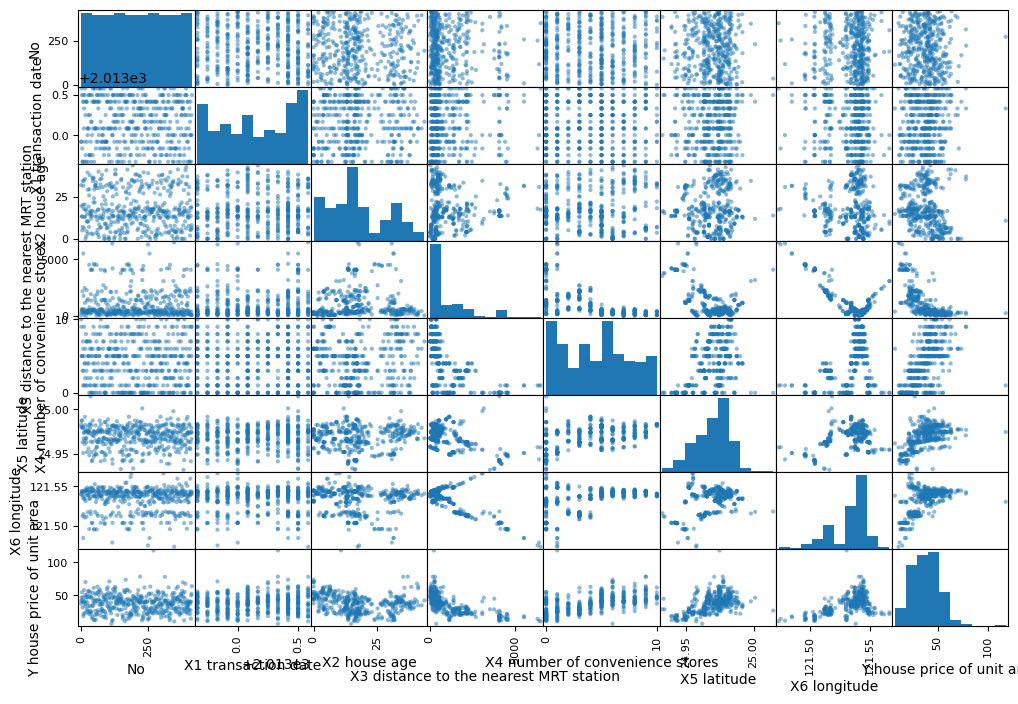

In [425]:
from pandas.plotting import scatter_matrix

scatter_matrix(DF[DF.columns.tolist()], figsize=(12,8))
plt.show()

We can derive some interesting conclusions as to how we want to approach our next steps from the above correlation matrix. Notably, we can note that the features involving positional data may be benefitted from feature engineering. Particularly from the correlation matrix, we can see that X4 ~ number of convenience stores, X5 ~ latitude, and X6 ~ longitude are the most highly correlated with the house price per unit area.

# C. Pre-processing

## C.1 Missing value imputation

It's possible that we may want to assess outliers, as we can remember we are fortunate to have filled in values for the entirety of the dataset. Let's see if there is motive to remove outliers for X3 ~ distance to the nearest MRT, to settle our debate of whether the "sub-urban" outliers are helpful or harmful to performace. We should trust statistical understanding that the model may perform better (less sensitively) without outliers. A good choice, if changing these values is necessary, is changing them to either the mean or median value (choosing whichever is higher could help compensate for the loss of outliers). 

In [426]:
X3_2_mean = DF['X3 distance to the nearest MRT station'].apply(lambda d: DF['X3 distance to the nearest MRT station'].mean() if d > 3200 else d)
X3_2_median = DF['X3 distance to the nearest MRT station'].apply(lambda d: DF['X3 distance to the nearest MRT station'].median() if d > 3200 else d)

from scipy.stats import ks_2samp
print(ks_2samp(DF['X3 distance to the nearest MRT station'], X3_2_mean))
print(ks_2samp(DF['X3 distance to the nearest MRT station'], X3_2_median))

KstestResult(statistic=0.0893719806763285, pvalue=0.07323569379194313, statistic_location=1156.777, statistic_sign=-1)
KstestResult(statistic=0.0893719806763285, pvalue=0.07323569379194313, statistic_location=512.5487, statistic_sign=-1)


Since we have a smaller number of outliers, at under 10%, I decided to impute the mean value of X3, as it was higher than the median. I will use this fixed up data for X3, with reduced outliers, as my dataset in pandas.

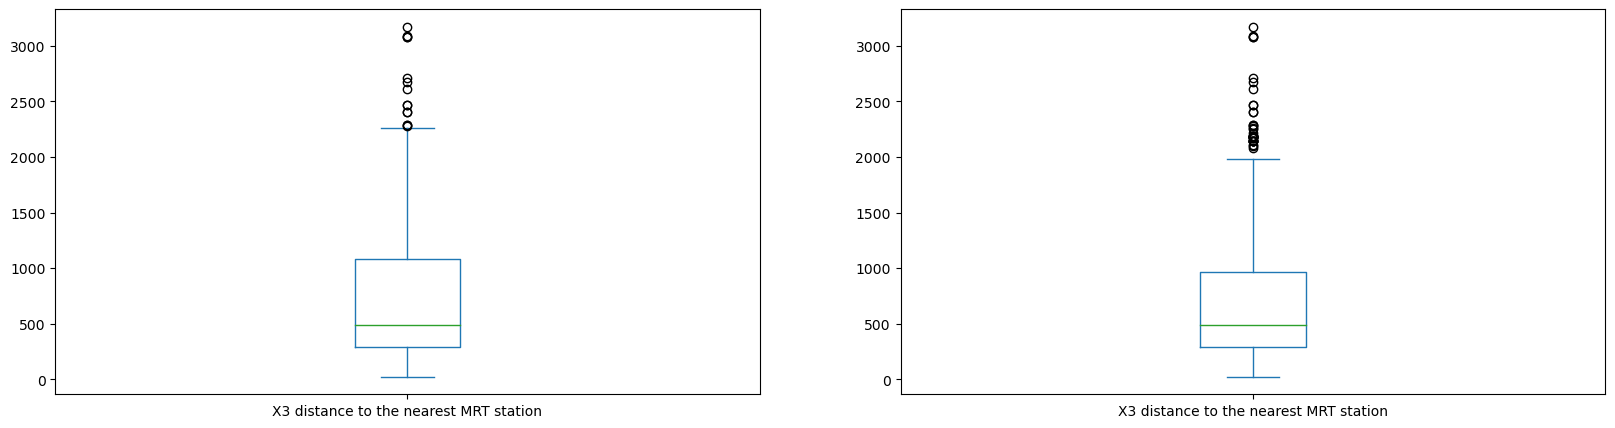

In [427]:
fig, (ax9, ax10) = plt.subplots(1, 2, figsize=(20,5))
X3_2_mean.plot.box(ax=ax9)

X3_2_median.plot.box(ax=ax10)
plt.show()

In [428]:
DF['X3 distance to the nearest MRT station'].describe()

count     414.000000
mean     1083.885689
std      1262.109595
min        23.382840
25%       289.324800
50%       492.231300
75%      1454.279000
max      6488.021000
Name: X3 distance to the nearest MRT station, dtype: float64

In [429]:
# DF_ = DF
# DF_["X3 distance to the nearest MRT station"] = X3_2_mean
# DF_.describe()

X3_2_mean.describe()

count     414.000000
mean      785.271671
std       677.920160
min        23.382840
25%       289.324800
50%       492.231300
75%      1083.885689
max      3171.329000
Name: X3 distance to the nearest MRT station, dtype: float64

As we can see above, we have successfully reduced the outliers and imputed with the mean. In addition, the mean has been effectively reduced (from 1083.89 to 785.27) to a value much closer to the median (492.23), as we try to make our data fit a normal distribution. This is good to do, particularly before we begin scaling our data. Let's fill this new data for X3 in our data frame.

In [430]:
DF['X3 distance to the nearest MRT station'] = X3_2_mean # inpute mean into DF
# DF.describe()

## C.2 Scaling
### Normalization and Standardizations

In [431]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
mm=MinMaxScaler()
sc = StandardScaler()

In [432]:
# X3_t = DF['X3 distance to the nearest MRT station']
# X3_MM = mm.fit_transform(np.array(X3_t).reshape(-1,1))
# X3_MM = X3_MM.reshape(1,len(X3_t))[0] #Flat to 1-D

# fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(15,5))
# ax1.hist(DF['X3 distance to the nearest MRT station'])
# ax1.set_title('X3 Before MinMaxScaler')
# ax2.hist(pd.Series(X3_MM))
# ax2.set_title('X3 After MinMaxScaler')
# plt.show()



We have effectively turned X3 from its much greater scale to an equivalent scale of 0-1.

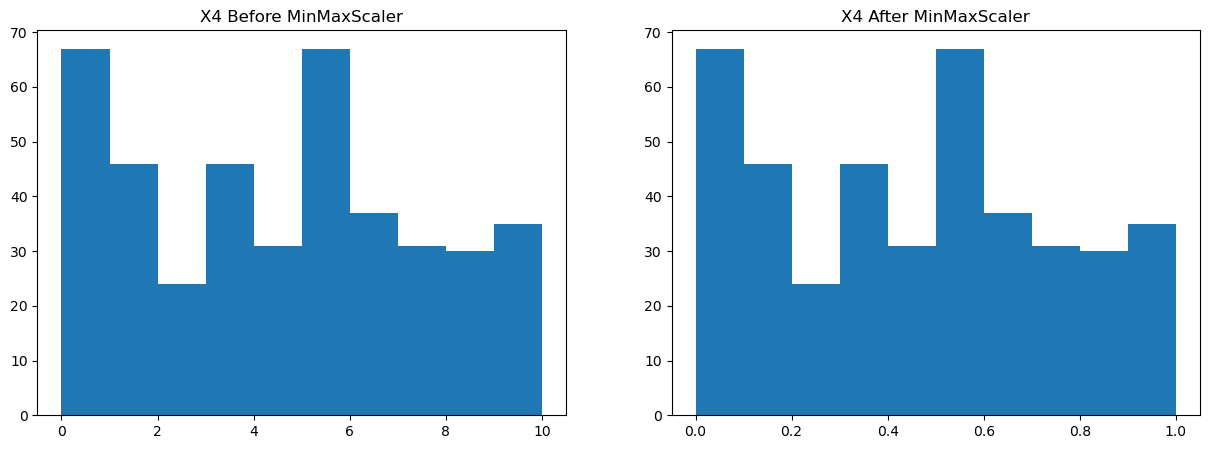

In [433]:
# normalization equation:
# X4_n = DF['X4 number of convenience stores']
# X4_n_max, X4_n_min = X4_n.max(), X4_n.min()
# X4_n = (X4_n-X4_n_min)/(X4_n_max-X4_n_min)

X4_MM = DF['X4 number of convenience stores']
X4_MM = MinMaxScaler().fit_transform(np.array(X4_MM).reshape(-1,1))
X4_MM = X4_MM.reshape(1,len(X4_MM))[0] #Flat to 1-D
# the normalization is behaving weird as it makes our data less continuous (bad tranformation?) at key quantiles, so using minmax is better

fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(15,5))
ax1.hist(DF['X4 number of convenience stores'])
ax1.set_title('X4 Before MinMaxScaler')
ax2.hist(X4_MM)
ax2.set_title('X4 After MinMaxScaler')
plt.show()


We have the same data distribution, but now we have a scale from [0.0, 1.0] opposed to [0, 10]. This will make computation easier, and it is helpful that we have essentially only divided all of the data by 10. In addition, it may be fruitful to scale out X5, X6 column-data. At the moment, our longitudinal values may make more effect than our latitudinal values, though they are respectively in the same relative range. To counteract possible errors with longitudinal values playing a higher weight on the predicitive model, which it shouldn't we will standardize these features.

In [434]:
X5_S = mm.fit_transform(np.array(DF['X5 latitude']).reshape(-1,1))

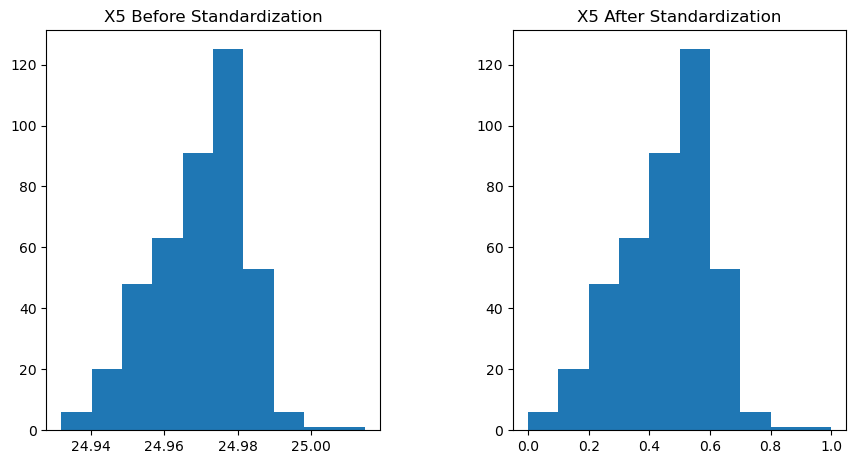

In [435]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
# X5 = np.array(DF['X5 latitude'])
ax1.hist(DF['X5 latitude'])
ax2.hist(X5_S)
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.4)
ax1.set_title('X5 Before Standardization')
ax2.set_title('X5 After Standardization')
plt.show()

This looks much better, and I think both the SGD algorithm as well as the Sci-Kit implementation will lead to higher performace with such scaling. Let's do the same thing for the longitudinal data, and see how we can compare them for model preparedness.

In [436]:
X6_S = mm.fit_transform(np.array(DF['X6 longitude']).reshape(-1,1))

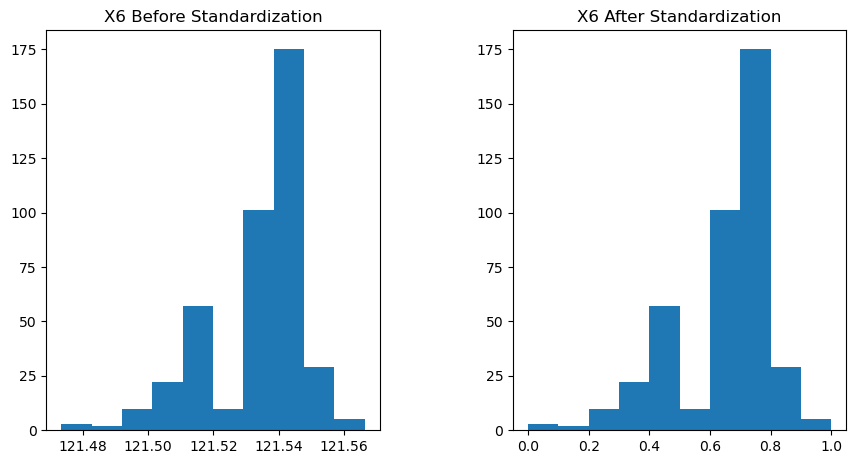

In [437]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
# X5 = np.array(DF['X5 latitude'])
ax1.hist(DF['X6 longitude'])
ax2.hist(X6_S)
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.4)
ax1.set_title('X6 Before Standardization')
ax2.set_title('X6 After Standardization')
plt.show()

We have much better domain of our features for X4, X5, and X6 through scaling. Their distributions now have values much smaller and closer to zero. It may be particularly desirable to also scale the feature X3 ~ distance to the nearest MRT, as it has high distance data in a wide range. I will normalize this data, such that it is more suitable for the model, and also is in the range [0,1]. Similarly, we will normalize our target.

In [438]:
Y_N = mm.fit_transform(np.array(DF['Y house price of unit area']).reshape(-1,1))

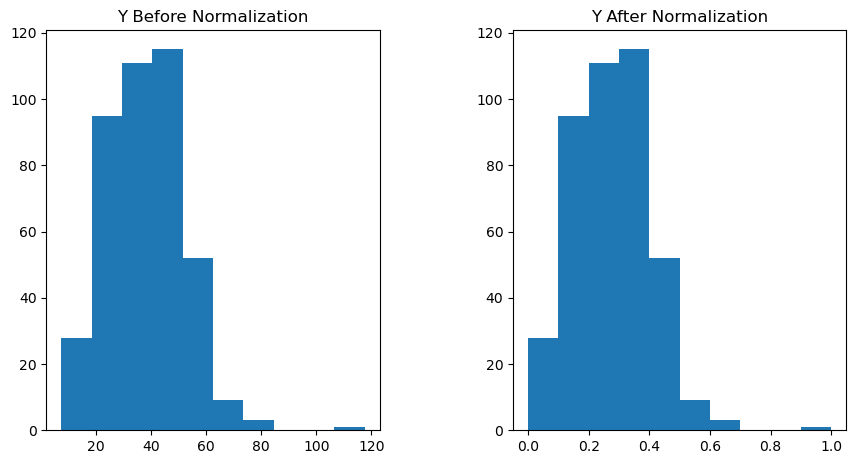

In [439]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
# X5 = np.array(DF['X5 latitude'])
ax1.hist(DF['Y house price of unit area'])
ax2.hist(Y_N)
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.4)
ax1.set_title('Y Before Normalization')
ax2.set_title('Y After Normalization')
plt.show()

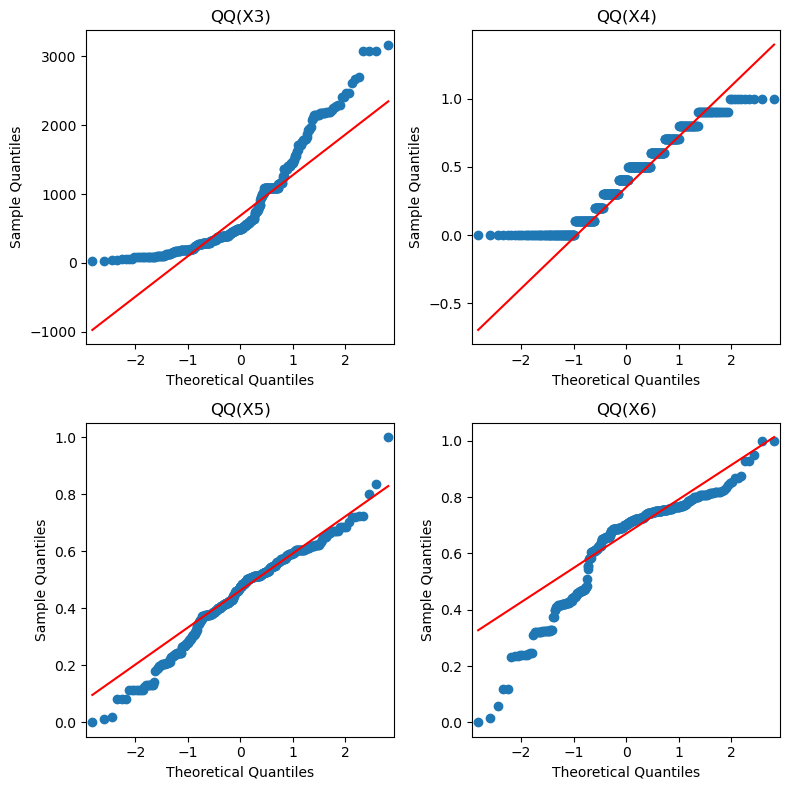

In [440]:
# DF['X3 distance to the nearest MRT station'] = X3_MM  # We do end up doing this later!
DF['X4 number of convenience stores'] = X4_MM
DF['X5 latitude'] = X5_S
DF['X6 longitude'] = X6_S
DF['Y house price of unit area'] = Y_N

fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(2, 2, figsize=(8,8))
fig = sm.qqplot(DF['X3 distance to the nearest MRT station'], line='q', ax=ax1)
ax1.set_title('QQ(X3)')
fig = sm.qqplot(DF['X4 number of convenience stores'], line='q',ax=ax2)
ax2.set_title('QQ(X4)')
fig = sm.qqplot(DF['X5 latitude'], line='q', ax=ax3)
ax3.set_title('QQ(X5)')
fig = sm.qqplot(DF['X6 longitude'], line='q', ax=ax4)
ax4.set_title('QQ(X6)')
plt.tight_layout()
plt.show()

As a quick recap, we have now fixed the outliers as well as normalized (through MinMaxScaling) on X3 ~ distance to the nearest MRT station. We have similarly normalized X4 ~ number of convenience stores, and normalized the positional data of X5 and X6. By normalizing X4, X5, X6, and Y, we can be certain that they are in a similar scale. Additionally, the mean's and median's have become much closer together. If we find tha for some of them, longitude, we may choose to reevaluate the choice of not removing and reimputing the outliers for the positional data features (at least for longitude).

In [441]:
DF.describe()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,207.500000,2013.148971,17.712560,785.271671,0.409420,0.447892,0.645149,0.276435
std,119.655756,0.281967,11.392485,677.920160,0.294556,0.150390,0.165486,0.123808
min,1.000000,2012.667000,0.000000,23.382840,0.000000,0.000000,0.000000,0.000000
25%,104.250000,2012.917000,9.025000,289.324800,0.100000,0.374818,0.588257,0.182894
50%,207.500000,2013.167000,16.100000,492.231300,0.400000,0.472976,0.701962,0.280710
75%,310.750000,2013.417000,28.150000,1083.885689,0.600000,0.549988,0.752372,0.354868
max,414.000000,2013.583000,43.800000,3171.329000,1.000000,1.000000,1.000000,1.000000


### Skewed data transformations

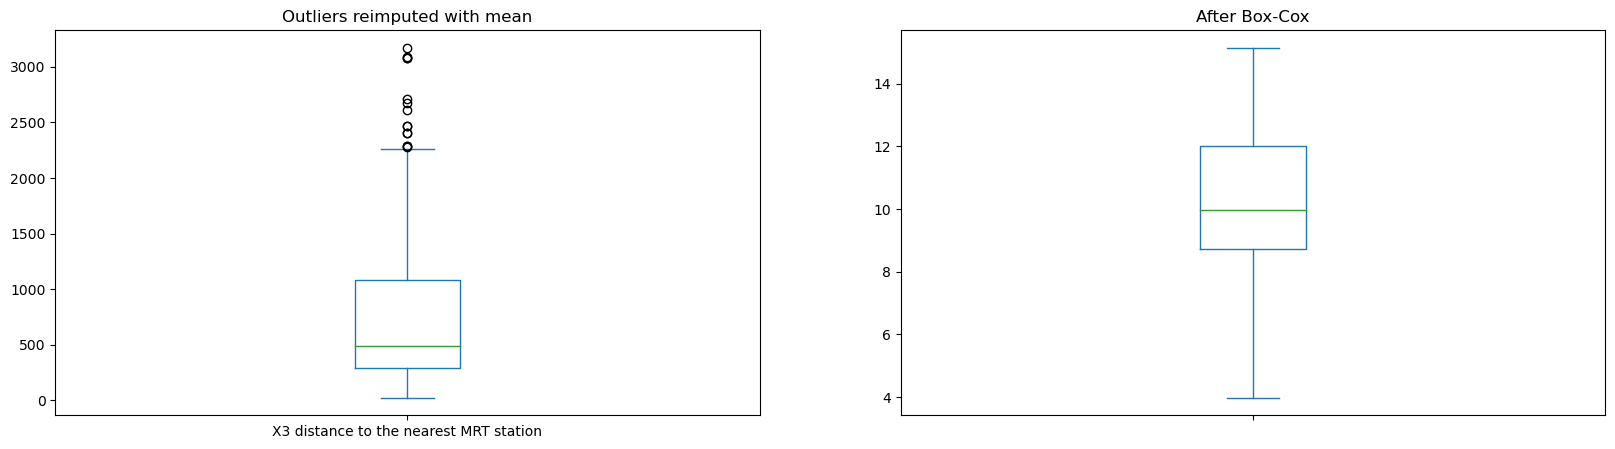

In [442]:
from scipy import stats


X3_B = stats.boxcox(DF["X3 distance to the nearest MRT station"])[0]

fig, (ax11, ax12) = plt.subplots(1, 2, figsize=(20,5))
DF['X3 distance to the nearest MRT station'].plot.box(ax=ax11) # the mean imputed
ax11.set_title('Outliers reimputed with mean')

pd.Series(X3_B).plot.box(ax=ax12) # Box-cox'ed
ax12.set_title('After Box-Cox')
plt.show()

In [443]:
print(DF['X3 distance to the nearest MRT station'].describe())
DF['X3 distance to the nearest MRT station'] = X3_B # gives us a much better (normal) fit
DF['X3 distance to the nearest MRT station'].describe()

count     414.000000
mean      785.271671
std       677.920160
min        23.382840
25%       289.324800
50%       492.231300
75%      1083.885689
max      3171.329000
Name: X3 distance to the nearest MRT station, dtype: float64


count    414.000000
mean      10.291067
std        2.312191
min        3.980888
25%        8.728027
50%        9.968161
75%       11.993047
max       15.140273
Name: X3 distance to the nearest MRT station, dtype: float64

We did not lose any of the patterns in our data. In fact, we just transformed the data into a new format that is better suited for the machine learning model using the Box Cox method, while maintaining these patterns and the distribution. As we can see, we have maintained a notable left skew (identifiable through a denser distribution in the Q1-Q2 region), while getting the remainder of the outliers closer to the Gaussian state. Additionally, the correlation coefficient for X3 was exactly maintained. Median and mean are now much closer after leveraging the Box Cox method for skews. We had seen that this also removed our outliers, which was very nice.

In [444]:
# DF['X3 distance to the nearest MRT station']= X3_B
corr_matrix['Y house price of unit area'].sort_values(ascending=False)

Y house price of unit area                1.000000
X4 number of convenience stores           0.571005
X5 latitude                               0.546307
X6 longitude                              0.523287
X1 transaction date                       0.087491
No                                       -0.028587
X2 house age                             -0.210567
X3 distance to the nearest MRT station   -0.673613
Name: Y house price of unit area, dtype: float64

Standalone, the table above shows how X3 has the strongest (albeit negative) relationship with our target. Next, we have X4 ~ number of convenience stores, X5 ~ latitude, and X6 ~ longitude with moderate positive correlations on our target. X1 and X2 have very weak and weak correlations on the target, respectively. We will certainly keep the data here in our data frame if it ever does become necessary, but we will acknoweledge their weak relationships with the target, as well as all other features. Still, we should note feature engineering may make promising contributions to increase model performance. However, with our problem size and implementation skill, it could be realized that feature engineering may not be necessary or required as it is not an explicit part of direction.

In [445]:
from scipy.stats import kstest

k1 = kstest(DF['X1 transaction date'], 'norm')
k2 = kstest(DF['X2 house age'], 'norm')
k3 = kstest(DF['X3 distance to the nearest MRT station'], 'norm')
k4 = kstest(DF['X4 number of convenience stores'], 'norm')
k5 = kstest(DF['X5 latitude'], 'norm')
k6 = kstest(DF['X6 longitude'], 'norm')
k_y = kstest(DF['Y house price of unit area'], 'norm')

ks_tests = [k1,k2,k3,k4,k5,k6,k_y]

for i in ks_tests:
    print(i)


KstestResult(statistic=1.0, pvalue=0.0, statistic_location=2012.667, statistic_sign=-1)
KstestResult(statistic=0.9164956486838857, pvalue=0.0, statistic_location=2.5, statistic_sign=-1)
KstestResult(statistic=0.9999656708495451, pvalue=0.0, statistic_location=3.9808879821909335, statistic_sign=-1)
KstestResult(statistic=0.5, pvalue=3.1272428888197632e-96, statistic_location=0.0, statistic_sign=-1)
KstestResult(statistic=0.5312376192653139, pvalue=1.401921649872548e-109, statistic_location=0.11488124091130203, statistic_sign=-1)
KstestResult(statistic=0.5877395238687816, pvalue=1.2302395564454736e-136, statistic_location=0.3222989001510541, statistic_sign=-1)
KstestResult(statistic=0.5106503773311198, pvalue=1.1628369828243954e-100, statistic_location=0.03275705186533212, statistic_sign=-1)


As we can see from the Kolmogorov-Smirnov test with the null hypothesis at 95% confidence that the data in each feature are drawn from a normal distribution. None of these distributions fit a normal distribution, which is fine, but it may be good to test how these features relate to the target as well, using the ks_2samp test, which instead tests on two distributions. 

In [446]:
from scipy.stats import ks_2samp, ks_1samp
features= DF.columns.tolist()
feats = features[1:-1]
target = features[len(features)-1]


for x in feats:
    print(ks_2samp(DF[target],DF[x]))

KstestResult(statistic=1.0, pvalue=4.0308795452190955e-248, statistic_location=0.9999999999999999, statistic_sign=1)
KstestResult(statistic=0.9589371980676329, pvalue=3.881816757446777e-213, statistic_location=0.9999999999999999, statistic_sign=1)
KstestResult(statistic=1.0, pvalue=4.0308795452190955e-248, statistic_location=0.9999999999999999, statistic_sign=1)
KstestResult(statistic=0.45169082125603865, pvalue=2.0201822442039313e-38, statistic_location=0.49681528662420377, statistic_sign=1)
KstestResult(statistic=0.5748792270531401, pvalue=1.4611149946464534e-63, statistic_location=0.37306642402183804, statistic_sign=1)
KstestResult(statistic=0.785024154589372, pvalue=9.142484224618425e-127, statistic_location=0.4176524112829845, statistic_sign=1)


A final unenjoyable feature, that never found a good "work-around" is the values for X3. Ideally, all of our features are similar in range, so we will employ normalization (scaling), now that the transformation has taken place.

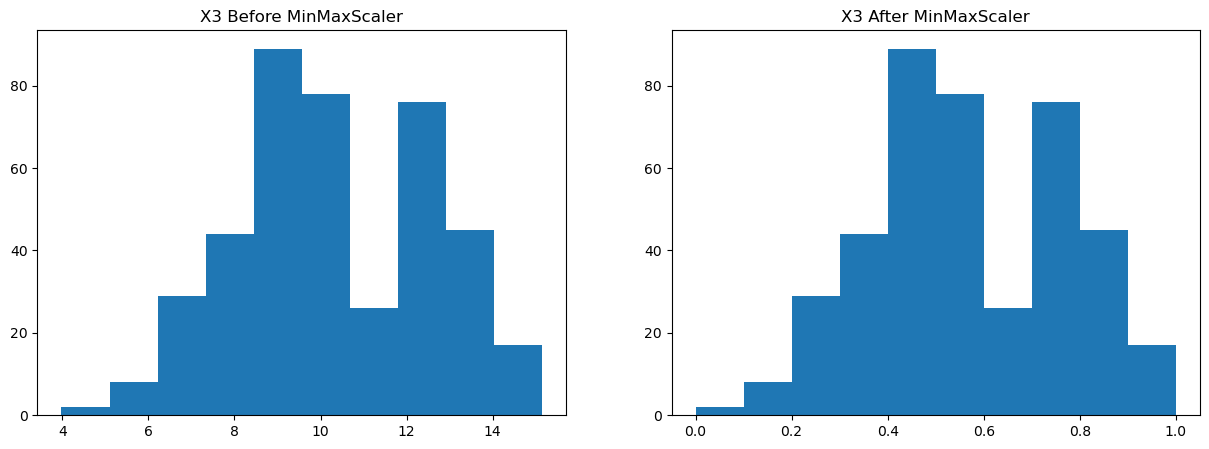

In [447]:
X3_t = DF['X3 distance to the nearest MRT station']
X3_MM = mm.fit_transform(np.array(X3_t).reshape(-1,1))
X3_MM = X3_MM.reshape(1,len(X3_t))[0] #Flat to 1-D

fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(15,5))
ax1.hist(DF['X3 distance to the nearest MRT station'])
ax1.set_title('X3 Before MinMaxScaler')


ax2.hist(pd.Series(X3_MM))
ax2.set_title('X3 After MinMaxScaler')
plt.show()
# hi

In [448]:
print(DF['X3 distance to the nearest MRT station'].describe())
pd.Series(X3_MM).describe()

count    414.000000
mean      10.291067
std        2.312191
min        3.980888
25%        8.728027
50%        9.968161
75%       11.993047
max       15.140273
Name: X3 distance to the nearest MRT station, dtype: float64


count    414.000000
mean       0.565459
std        0.207197
min        0.000000
25%        0.425394
50%        0.536524
75%        0.717975
max        1.000000
dtype: float64

In [449]:
# DF['X3 distance to the nearest MRT station'] = X3_MM

DF['X3 distance to the nearest MRT station'] = X3_MM

DF_=DF
DF_ = DF_.drop('X1 transaction date', axis=1)
DF_ = DF_.drop('X2 house age', axis=1)
DF_.describe()

,No,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,207.500000,0.565459,0.409420,0.447892,0.645149,0.276435
std,119.655756,0.207197,0.294556,0.150390,0.165486,0.123808
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,104.250000,0.425394,0.100000,0.374818,0.588257,0.182894
50%,207.500000,0.536524,0.400000,0.472976,0.701962,0.280710
75%,310.750000,0.717975,0.600000,0.549988,0.752372,0.354868
max,414.000000,1.000000,1.000000,1.000000,1.000000,1.000000


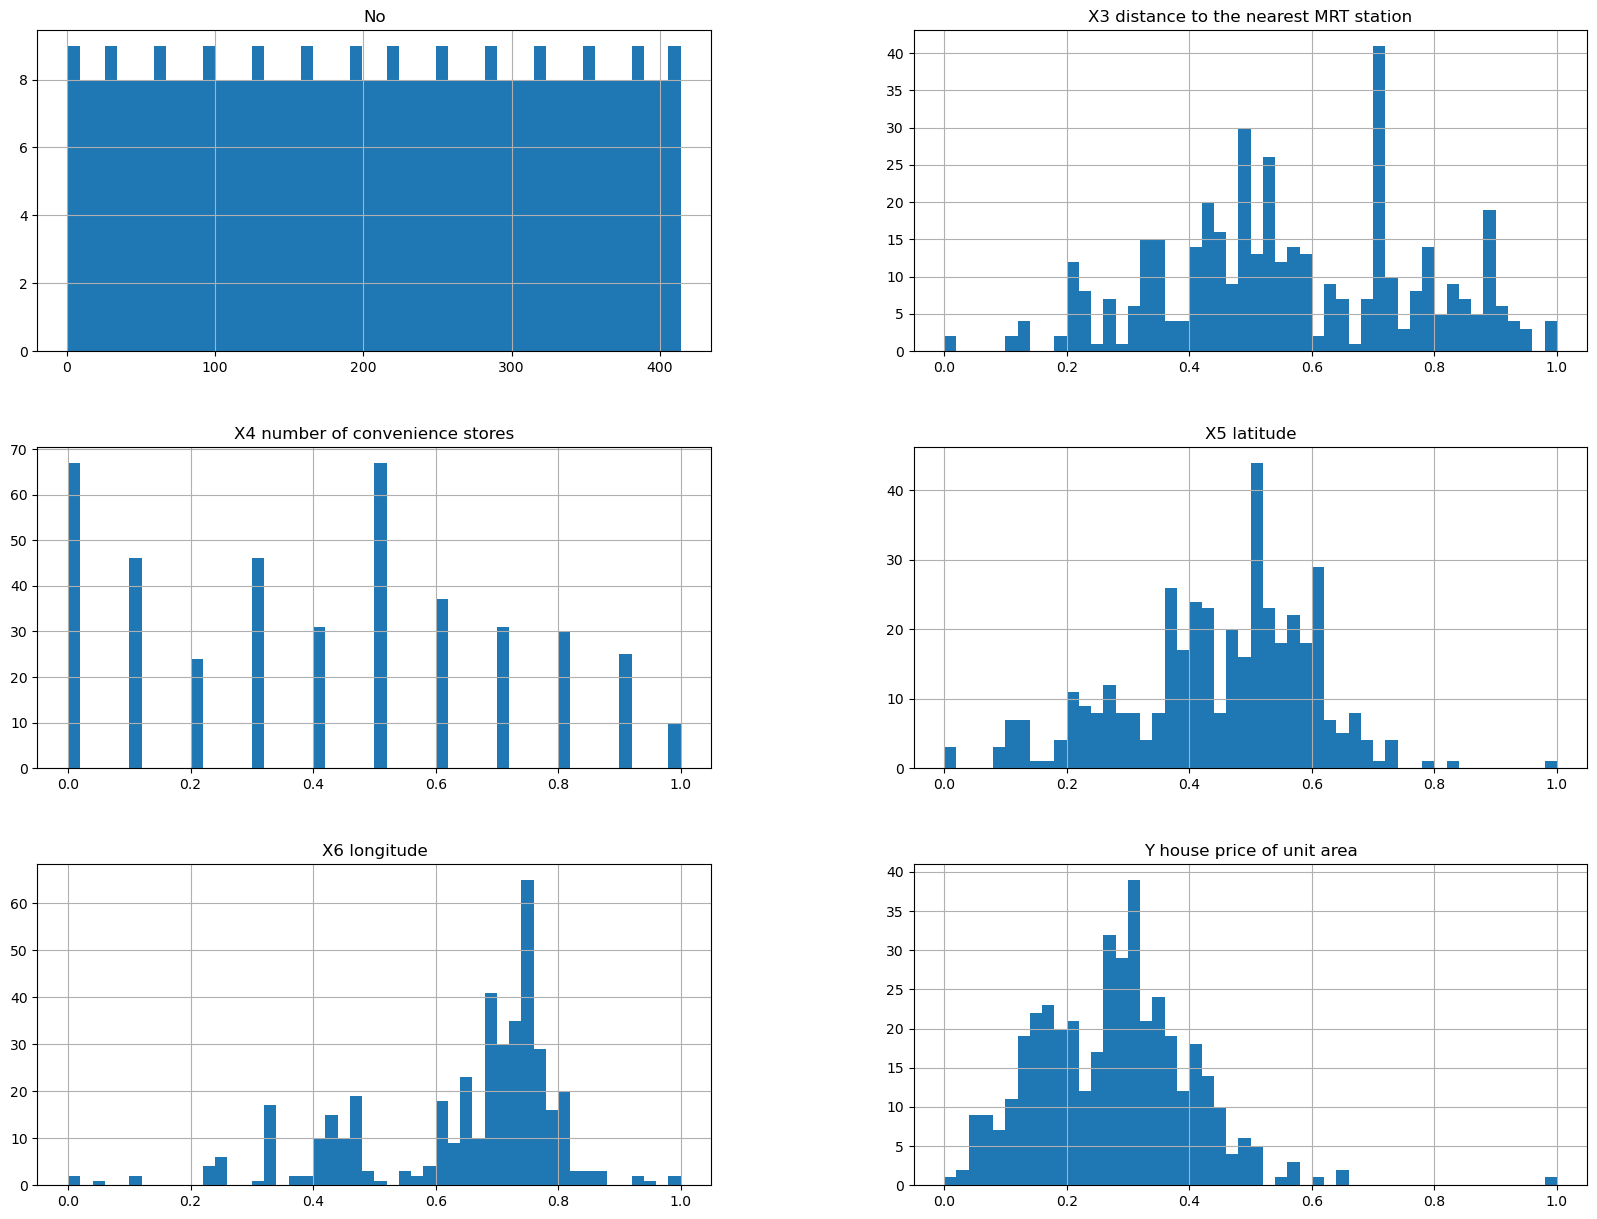

In [450]:
DF_.hist(bins=50, figsize=(20,15))
plt.show()

I think the data is much more suited for our implementations at this point. We have all of our features of interest scaled and necessarily transformed to relatable scales. We have realized X3 through X6 as our features to use for prediction on the target Y.

### Data Split

In [451]:
DF = DF_
from scipy.stats import kstest

# k1 = kstest(DF['X1 transaction date'], 'norm')
# k2 = kstest(DF['X2 house age'], 'norm')
k3 = kstest(DF['X3 distance to the nearest MRT station'], 'norm')
k4 = kstest(DF['X4 number of convenience stores'], 'norm')
k5 = kstest(DF['X5 latitude'], 'norm')
k6 = kstest(DF['X6 longitude'], 'norm')
k_y = kstest(DF['Y house price of unit area'], 'norm')

ks_tests = [k3,k4,k5,k6,k_y]

for i in ks_tests:
    print(i)

KstestResult(statistic=0.5579576122404326, pvalue=6.927170608161522e-122, statistic_location=0.19494317660195315, statistic_sign=-1)
KstestResult(statistic=0.5, pvalue=3.1272428888197632e-96, statistic_location=0.0, statistic_sign=-1)
KstestResult(statistic=0.5312376192653139, pvalue=1.401921649872548e-109, statistic_location=0.11488124091130203, statistic_sign=-1)
KstestResult(statistic=0.5877395238687816, pvalue=1.2302395564454736e-136, statistic_location=0.3222989001510541, statistic_sign=-1)
KstestResult(statistic=0.5106503773311198, pvalue=1.1628369828243954e-100, statistic_location=0.03275705186533212, statistic_sign=-1)


In [452]:
from sklearn.model_selection import train_test_split
# It is assumed that DF_ is our dataset that is prepared for the SGD
train_set, test_set = train_test_split(DF, test_size=0.25, random_state=42)
test_set

,No,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
358,359,0.346785,0.6,0.407659,0.726332,0.341219
350,351,0.536524,0.5,0.400873,0.688376,0.315742
373,374,0.414493,0.1,0.517814,0.615268,0.405823
399,400,0.322461,0.1,0.504605,0.607181,0.270246
369,370,0.897220,0.3,0.377484,0.418805,0.138308
...,...,...,...,...,...,...
63,64,0.554098,0.4,0.513572,0.799224,0.431301
261,262,0.909621,0.3,0.324527,0.431960,0.152866
297,298,0.567558,0.4,0.460010,0.779275,0.190173
113,114,0.488549,0.6,0.359307,0.696463,0.000000


In [453]:
features= DF.columns.tolist()
feats = features[1:-1]
target = features[len(features)-1]


for x in feats:
    print(ks_2samp(DF[target],DF[x]))

KstestResult(statistic=0.6618357487922706, pvalue=3.8330790159113366e-86, statistic_location=0.4131028207461328, statistic_sign=1)
KstestResult(statistic=0.45169082125603865, pvalue=2.0201822442039313e-38, statistic_location=0.49681528662420377, statistic_sign=1)
KstestResult(statistic=0.5748792270531401, pvalue=1.4611149946464534e-63, statistic_location=0.37306642402183804, statistic_sign=1)
KstestResult(statistic=0.785024154589372, pvalue=9.142484224618425e-127, statistic_location=0.4176524112829845, statistic_sign=1)


In [454]:
corr_matrix['Y house price of unit area'].sort_values(ascending=False)

Y house price of unit area                1.000000
X4 number of convenience stores           0.571005
X5 latitude                               0.546307
X6 longitude                              0.523287
X1 transaction date                       0.087491
No                                       -0.028587
X2 house age                             -0.210567
X3 distance to the nearest MRT station   -0.673613
Name: Y house price of unit area, dtype: float64

b)	[35 pts] Define a function linear regression model that takes the learning rate = 0.05 and iteration = 1000. This model will perform SGD. You can initialize random weights using NumPy. Report the mean squared error (MSE). This model is going to return the learned weights. 

We will use a variation of the Linear Regression class for stochastic gradient descent. By taking the minumum of this partial derivative, which is our error function, we maximize our probability, and in theory our model is optimized.

In [455]:
eta = 0.05
itr = 1000

class LinReg():
    def __init__(self, eta, itr):
        self.eta = eta
        self.itr = itr


    #2
    # def shuffle_data(self):
    #     # Generate a random permutation of indices and use it to shuffle rows
    #     shuffled_indices = np.random.permutation(self.m)
    #     self.X = self.X[shuffled_indices]
    #     self.y = self.y[shuffled_indices]

    
    # X will be our features, and y is our target
    def fit(self, X, y):
        self.m, self.n = X.shape # m = # of rows (observations), n = # of columns (features + 1 [target])
        self.y = y
        self.X = X
        self.b = 0
        self.weights = np.zeros(self.n) #initializes the weight vector with zero

        for i in range(self.itr):
            # here
            # self.shuffle_data() #1
            self.update(X,y)
        return self
    
    def update(self, X, y):
        y_hat = self.predict(self.X) # predict with some bias


        dW = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
        #- (2 * (self.X.T).dot( self.y - y_hat)) / self.m # Weights for one feature (least squares)
        # NOTE: must use multivariate solution on D=4
        db = - 2 * np.sum( self.y - y_hat) / self.m #bias 

        # self.coeffs = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
        # Weight updates
        self.weights = self.weights - self.eta * dW
        self.b = self.b - self.eta * db
        return self
    
    # Hypthotical Function
    def predict(self, X):
        return X.dot( self.weights) + self.b
    
    
DF.describe()
# DF=DF.drop('No', axis = 1)

        

,No,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,207.500000,0.565459,0.409420,0.447892,0.645149,0.276435
std,119.655756,0.207197,0.294556,0.150390,0.165486,0.123808
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,104.250000,0.425394,0.100000,0.374818,0.588257,0.182894
50%,207.500000,0.536524,0.400000,0.472976,0.701962,0.280710
75%,310.750000,0.717975,0.600000,0.549988,0.752372,0.354868
max,414.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [456]:
from sklearn.metrics import mean_squared_error
df = DF
# df


model = LinReg(0.05, 1000)
model.fit(df.drop('Y house price of unit area', axis = 1),df['Y house price of unit area'])
Y_pred = model.predict(df.drop('Y house price of unit area', axis = 1))
# print("Y_hat: \n" + str(Y_pred))
# model.weights # prints X1 -6.631234 X2 5.386795 
print("\n\nModel weights:\n[  x3          x4          x5          x6]\n" + str(model.weights))
# model.b # prints 2.294252044065846
print("\n\nModel bias: " + str(model.b))
mse = mean_squared_error(df['Y house price of unit area'],Y_pred)
print("\n\nMean square error: " + str(mse))
np.sqrt(mse)



Model weights:
[  x3          x4          x5          x6]
[-2.13873830e-03  5.71973634e+00 -3.89024049e+00 -1.52275690e+01
 -1.23790043e+01]


Model bias: 13.749208330013232


Mean square error: 27.16467325839983


5.211974027026596

After some debugging, and trying to reason through tradeoffs, we have arrived at our first successful mean squared error of MSE = 27.334. We additionally received weights from the learning trial. These weights for X ~ [X3, X4, X5, X6] respectively estimate to about [5.40, -3.97, -15.33, -12.66].


c)	[15 pts] Use different learning rate values to retrain the model. 
    a.	Learning rates = [5E-3, 1E-2, 1E-1, 5E-1]
    b.	Report the MSE value for each learning rate.


Learning rate (eta): 5E-3

In [457]:
model = LinReg(5E-3, 1000)
model.fit(df.drop('Y house price of unit area', axis = 1),df['Y house price of unit area'])
Y_pred = model.predict(df.drop('Y house price of unit area', axis = 1))
Y_pred_5en3 = Y_pred

# print("Prediction [fx(residuals)] on test set w/ 103 observations:")
# obs = 1
# for i in Y_pred:
#     print("Prediction on test observation " + str(obs) + ": " + str(i))
#     obs=obs+1

# print("Y_hat: \n" + str(Y_pred))
# model.weights # prints X1 -6.631234 X2 5.386795 
print("\n\nModel weights:\n[  x3          x4          x5          x6]\n" + str(model.weights))
# model.b # prints 2.294252044065846
print("\n\nModel bias: " + str(model.b))
mse = mean_squared_error(df['Y house price of unit area'],Y_pred)
print("\n\nMean square error: " + str(mse))
np.sqrt(mse)



Model weights:
[  x3          x4          x5          x6]
[-2.13873830e-04  5.71973634e-01 -3.89024049e-01 -1.52275690e+00
 -1.23790043e+00]


Model bias: 1.5012264068190393


Mean square error: 0.3890079159413088


0.6237049911146365

Learning rate (eta): 1E-1

In [458]:

model = LinReg(1E-1, 1000)
model.fit(df.drop('Y house price of unit area', axis = 1),df['Y house price of unit area'])
Y_pred = model.predict(df.drop('Y house price of unit area', axis = 1))

# print("Prediction [fx(residuals)] on test set w/ 103 observations:")
# obs = 1
# for i in y_hat:
#     print("Prediction on test observation " + str(obs) + ": " + str(i))
#     obs=obs+1

# print("Y_hat: \n" + str(Y_pred))
# model.weights # prints X1 -6.631234 X2 5.386795 
print("\n\nModel weights:\n[  x3          x4          x5          x6]\n" + str(model.weights))
# model.b # prints 2.294252044065846
print("\n\nModel bias: " + str(model.b))
mse = mean_squared_error(df['Y house price of unit area'],Y_pred)
print("\n\nMean square error: " + str(mse))
np.sqrt(mse)



Model weights:
[  x3          x4          x5          x6]
[-4.27747660e-03  1.14394727e+01 -7.78048097e+00 -3.04551381e+01
 -2.47580085e+01]


Model bias: 27.358070401425618


Mean square error: 106.69312155229723


10.329236252129062

Learning rate (eta): 1E-2

In [459]:

model = LinReg(1E-2, 1000)
model.fit(df.drop('Y house price of unit area', axis = 1),df['Y house price of unit area'])
Y_pred = model.predict(df.drop('Y house price of unit area', axis = 1))

# print("Prediction [fx(residuals)] on test set w/ 103 observations:")
# obs = 1
# for i in y_hat:
#     print("Prediction on test observation " + str(obs) + ": " + str(i))
#     obs=obs+1

# print("Y_hat: \n" + str(Y_pred))
# model.weights # prints X1 -6.631234 X2 5.386795 
print("\n\nModel weights:\n[  x3          x4          x5          x6]\n" + str(model.weights))
# model.b # prints 2.294252044065846
print("\n\nModel bias: " + str(model.b))
mse = mean_squared_error(df['Y house price of unit area'],Y_pred)
print("\n\nMean square error: " + str(mse))
np.sqrt(mse)



Model weights:
[  x3          x4          x5          x6]
[-4.27747660e-04  1.14394727e+00 -7.78048097e-01 -3.04551381e+00
 -2.47580085e+00]


Model bias: 2.862118672647144


Mean square error: 1.268176916324292


1.126133613886155

Learning rate (eta): 5E-1

In [460]:

model = LinReg(5E-1, 1000)
model.fit(df.drop('Y house price of unit area', axis = 1),df['Y house price of unit area'])
Y_pred = model.predict(df.drop('Y house price of unit area', axis = 1))

# print("Prediction [fx(residuals)] on test set w/ 103 observations:")
# obs = 1
# for i in y_hat:
#     print("Prediction on test observation " + str(obs) + ": " + str(i))
#     obs=obs+1

# print("Y_hat: \n" + str(Y_pred))
# model.weights # prints X1 -6.631234 X2 5.386795 
print("\n\nModel weights:\n[  x3          x4          x5          x6]\n" + str(model.weights))
# model.b # prints 2.294252044065846
print("\n\nModel bias: " + str(model.b))
mse = mean_squared_error(df['Y house price of unit area'],Y_pred)
print("\n\nMean square error: " + str(mse))
np.sqrt(mse)



Model weights:
[  x3          x4          x5          x6]
[-2.13873830e-02  5.71973634e+01 -3.89024049e+01 -1.52275690e+02
 -1.23790043e+02]


Model bias: 136.2289669727242


Mean square error: 2629.2338225523895


51.27605506035336

Amongst the five different test inputs for eta, the learning rate, we found some very different results. Computation never took too long to give results, which was a good sign that our data was well pre-processed. However, on some of the learning rate attempts, we recovered very high mean square error values. Notably;

@ eta = 0.05 : MSE = 27.334

@ eta = 0.005 : MSE = 0.391

@ eta = 0.1 : MSE = 107.366

@ eta = 0.01 : MSE = 1.275

@ eta = 0.5 : MSE = 2645.986

were learning rates all modeled using 1,000 iterations. It seems as though, at tao = 1000, and for the assumptions, distributions, correlations, and patterns present between our features and our target, we are able to make some decisions as to which predictor values (y_hat, y_pred in my code) at which tao make for the best optimization. Let's point out some tradeoffs if we go too far off onto either side. 

If we are trying to reduce our error in order to maximize our probability of correct estimation/prediction, then we must understand the tradeoffs, and the regions/domains of values that might work well with tao = 1000 (and generally). 

If we use a learning rate that is too high, for example in our last run with a learning rate eta = 0.5, we receive a mean square error of over 2600. This can be an expected response from the model, as we are using a very high learning rate, and this means that our predicted values are going to be very far off from the true values. It seems we have actually missed the point of global minimum onto our error estimations, since our learning rate is too high. When the learning rate is too high like in this case, we may converge much too fast and generally not reach a viable solution.

On the other end of the spectrum, there are instances sometimes where eta the learning rate is too low to converge to an efficable solution (minimum) in any reasonable time. Thankfully, I only faced the issue of waiting for compilations when I had syntax errors, or allowed my machine (pandas?) to get too overprocessed by pressing run very often. We don't want to go through so many epochs at such a low learning rate that convergence happens after (potentially) hundreds of thousands of iterations. Accuracy can be improved through leveraging this tradeoff, so in our case it may actually be good to use the lowest learning rate, since it still took very negligible time (0.8s) and the lowest error. These values seem to follow the normal distribution, indicating we have made some progress in reaching back to our target values.

Question 2: Scikit-learn linear regression. [20 pts]
In this question, students will use the Scikit-learn linear regression model to predict the real estate cost and compare the results in Question 1. 
    a)	[10 pts] Now import linear regression from Scikit-learn and train the model.
    b)	[5 pts] Get the prediction on the test set.
    c)	[5 pts] Compare the result of your model to that of the Scikit-learn model.


In [473]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
X = DF
X.drop('Y house price of unit area', axis = 1)
y = DF['Y house price of unit area']
# X

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state = 42)
model = LinearRegression()
model.fit(X_train, y_train)
y_hat = model.predict(X_test)

# print("Prediction [fx(residuals)] on test set w/ 103 observations:")
# obs = 1
# for i in y_hat:
#     print("Prediction on test observation " + str(obs) + ": " + str(i))
#     obs=obs+1

mse = mean_squared_error(y_test, y_hat)
print("\n\nMean square error: " + str(mse))



Mean square error: 5.282949821689833e-28


In comparing the stochastic descent model I made to the pre-built Scikit-Learn regression tool, I have made some interesting realizations. I think the SGD model at the lowest learning rate of 0.005 (5E-3) provided the most close results as to the Scikit-Learn model in terms of predicitive results. The SGD at eta = 0.005 got the closest (and lowest) mean square error, meaning overall that the eta = 0.005 had the best results and performance. Of course, the Scikit model had the most phenomenal of performance. It took no time to give results (0s compared to 0.8-0.9s), and we had the best performance by far. In any case, it was a worthwhile task to try to use least squares, error-estimation methods as a prerequisite for comprehension to harness the tools of making the data we are given suitable for a model. Comparably, we have much better results from Scikit which tells me of Scikit, and the general Anaconda package libraries, extensive tools in order to implement models and simplify calculations. I don't think I would have learned as much from the assignment without the necessity of trying the computations at multiple different learning rates, and with a wide combination of attempts at the means of understandig our data, and then actually preprocessing and preparing it for model implementation.